In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
# read in European polygon and lines as geodataframe
euro_poly_json = './NUTS_RG_20M_2021_4326.geojson'
euro_poly_df = gpd.read_file(euro_poly_json)
euro_lines_json = './NUTS_BN_20M_2021_4326.geojson' 
euro_lines_df = gpd.read_file(euro_lines_json)

In [3]:
# reproject geodataframe to EPSG 3035 to have non-sqashed Europe
euro_poly_df = euro_poly_df.to_crs('EPSG:3035')
euro_lines_df = euro_lines_df.to_crs('EPSG:3035')

In [4]:
# choose only country level lines
euro_lines_df = euro_lines_df[euro_lines_df['LEVL_CODE']==0]

In [5]:
# choose only country level polygons
euro_poly_df = euro_poly_df[euro_poly_df['LEVL_CODE']==0]

In [11]:
# read participants csv into dataframe
participants_csv = './participants.csv'
participants_df = pd.read_csv(participants_csv)
participants_df.columns

Index(['CNTR_CODE', 'Number'], dtype='object')

In [12]:
# merge on CNTR_CODE, keep all countries
european_participants_df = pd.merge(euro_poly_df,participants_df, on= 'CNTR_CODE', how='left')
european_participants_df

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Number
0,FR,FR,0,FR,France,France,0.0,NaN,0,FR,"MULTIPOLYGON (((9954235.622 -3059379.353, 9961...",1.0
1,HR,HR,0,HR,Hrvatska,Hrvatska,0.0,NaN,0,HR,"MULTIPOLYGON (((4827386.296 2618351.084, 48483...",NaN
2,HU,HU,0,HU,Magyarország,Magyarország,0.0,NaN,0,HU,"POLYGON ((5214660.279 2880853.697, 5216710.449...",NaN
3,AL,AL,0,AL,Shqipëria,Shqipëria,0.0,NaN,0,AL,"POLYGON ((5129579.314 2204099.274, 5148385.521...",NaN
4,AT,AT,0,AT,Österreich,Österreich,0.0,NaN,0,AT,"POLYGON ((4742889.099 2876362.871, 4783217.991...",NaN
5,BE,BE,0,BE,Belgique/België,Belgique/België,0.0,NaN,0,BE,"POLYGON ((3957507.060 3167693.957, 3964174.995...",NaN
6,BG,BG,0,BG,Bulgaria,България,0.0,NaN,0,BG,"POLYGON ((5363358.561 2390534.724, 5395245.448...",NaN
7,CH,CH,0,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0.0,NaN,0,CH,"POLYGON ((4221123.396 2731035.643, 4230515.051...",NaN
8,CY,CY,0,CY,Kýpros,Κύπρος,0.0,NaN,0,CY,"POLYGON ((6342668.984 1629618.630, 6342927.145...",NaN
9,CZ,CZ,0,CZ,Česko,Česko,0.0,NaN,0,CZ,"POLYGON ((4645979.192 3093184.523, 4656689.626...",NaN


[]

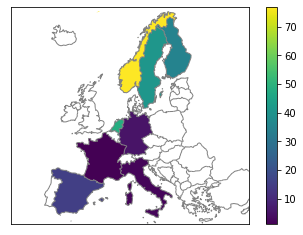

In [13]:
bounds = euro_lines_df.plot(edgecolor='grey', linewidth = 1)
european_participants_df.plot(column = 'Number', ax=bounds, legend=True)
bounds.set_xlim([2000000,6500000])
bounds.set_ylim([1400000,5500000])
bounds.get_xaxis().set_ticks([])
bounds.get_yaxis().set_ticks([])